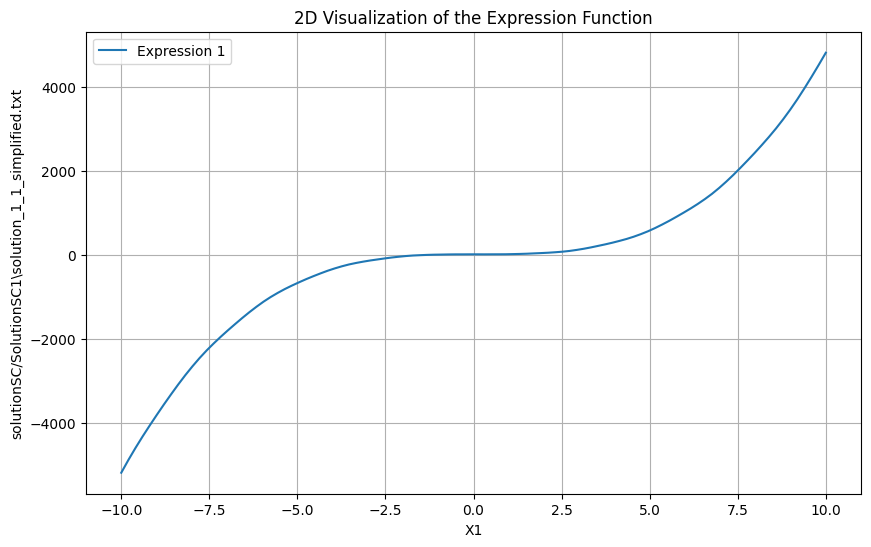

File solution/solution1\solution_1_1_simplified.txt not found.


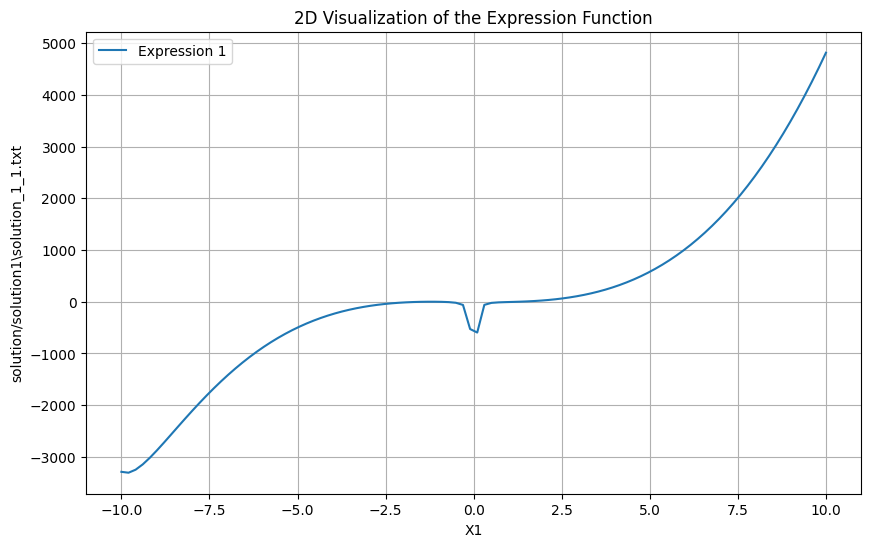

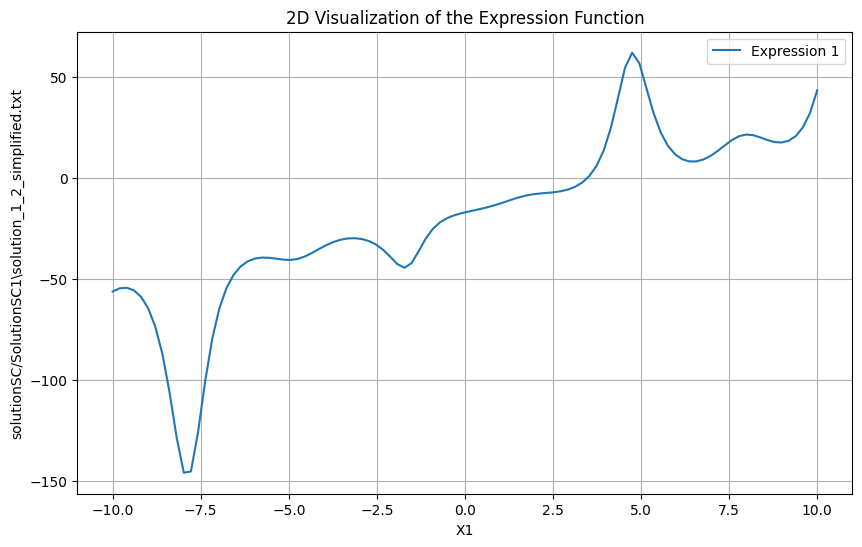

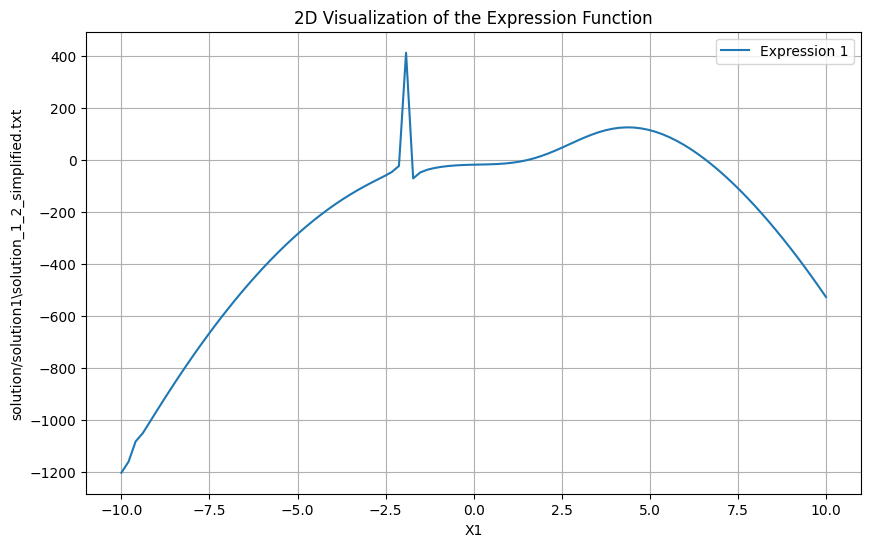

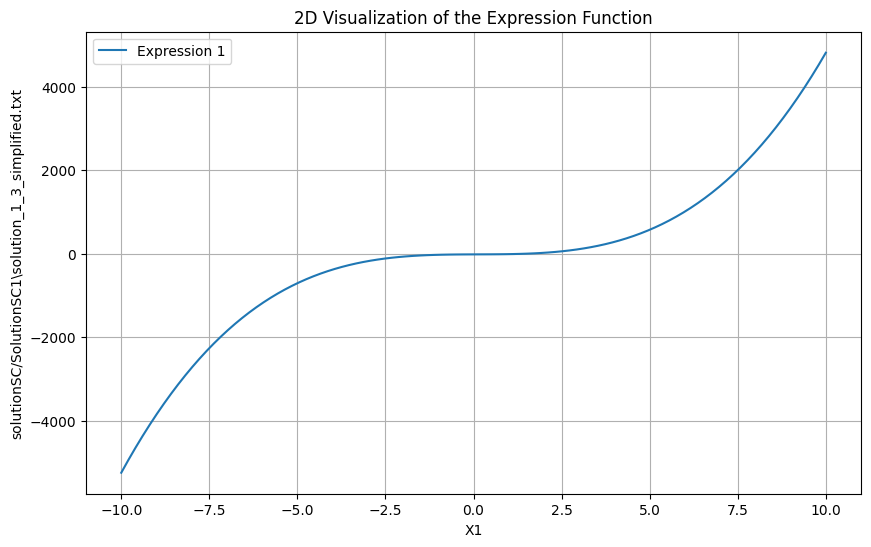

Error evaluating expression: 'ComplexInfinity'


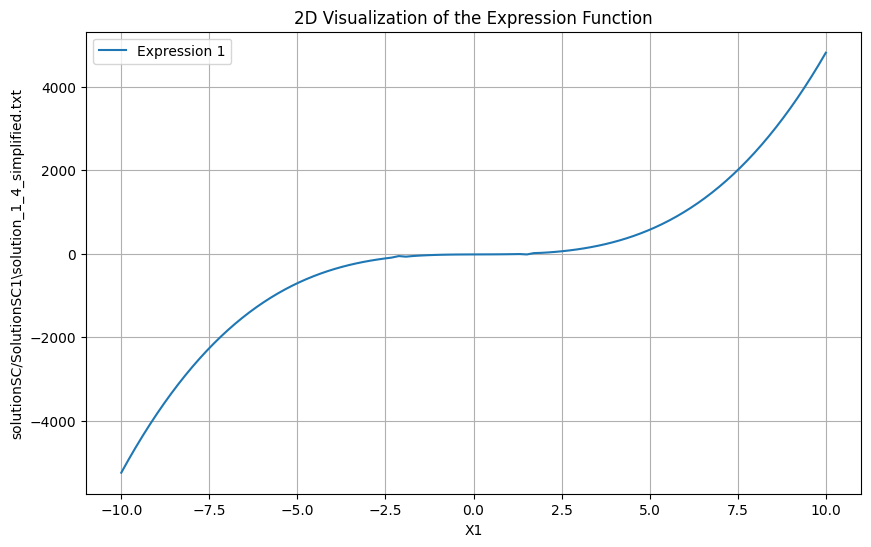

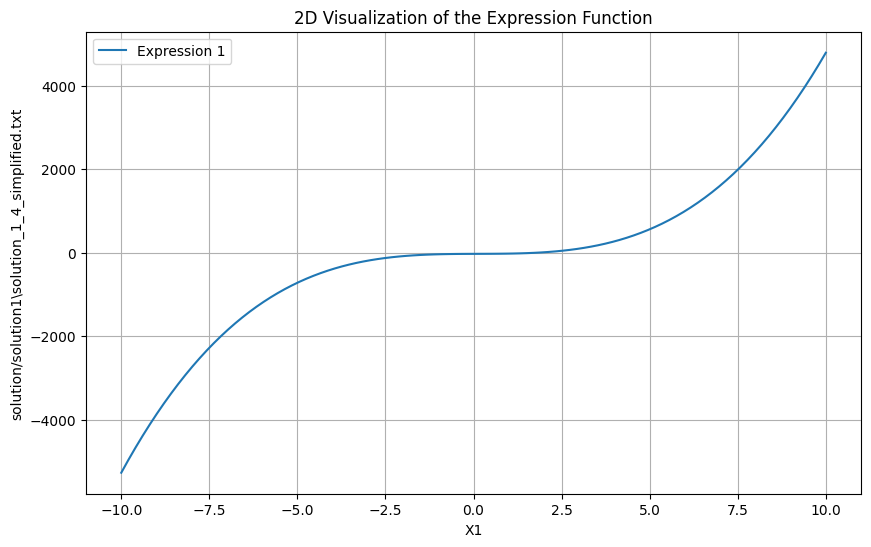

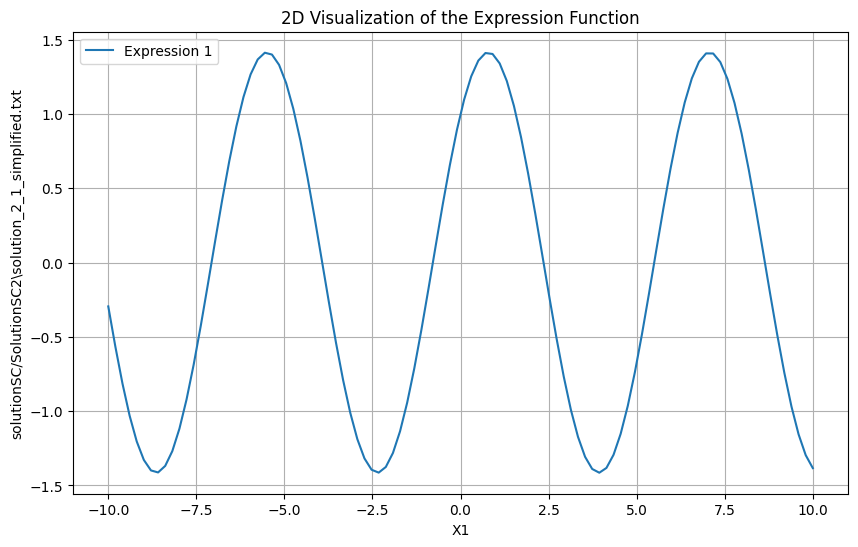

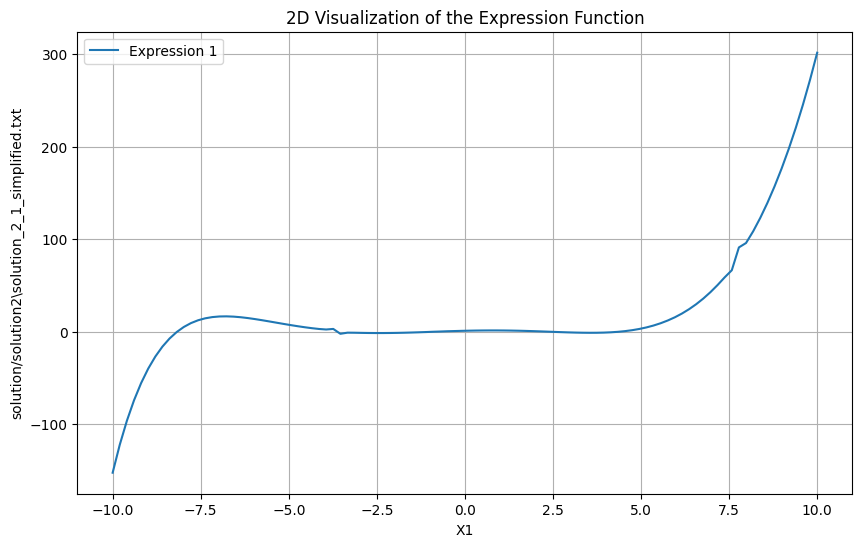

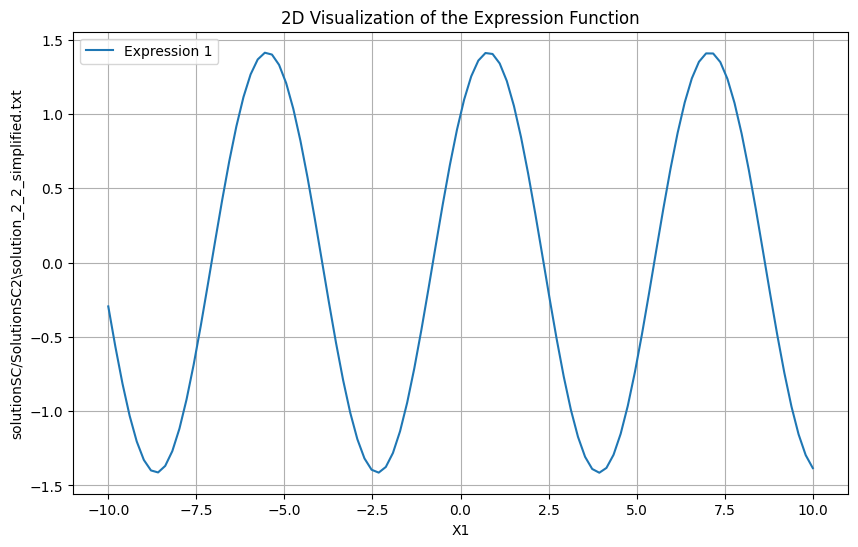

File solution/solution2\solution_2_2_simplified.txt not found.


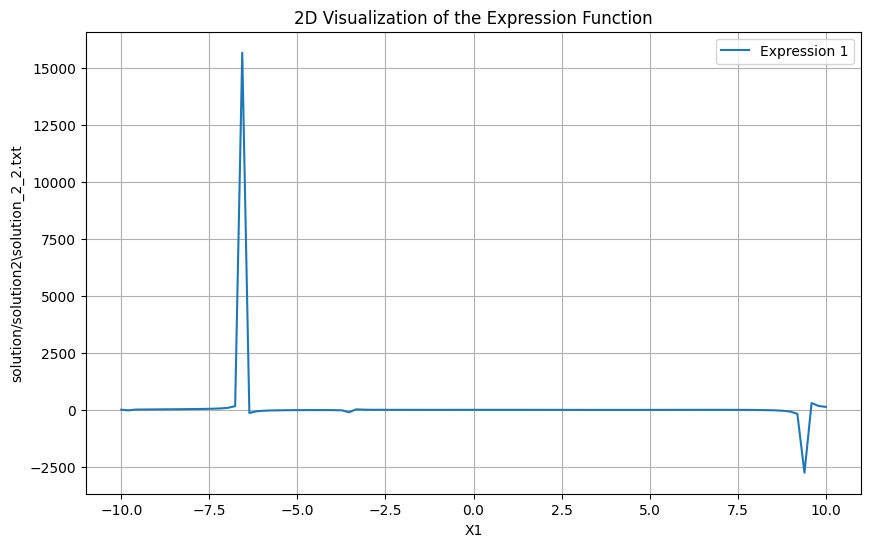

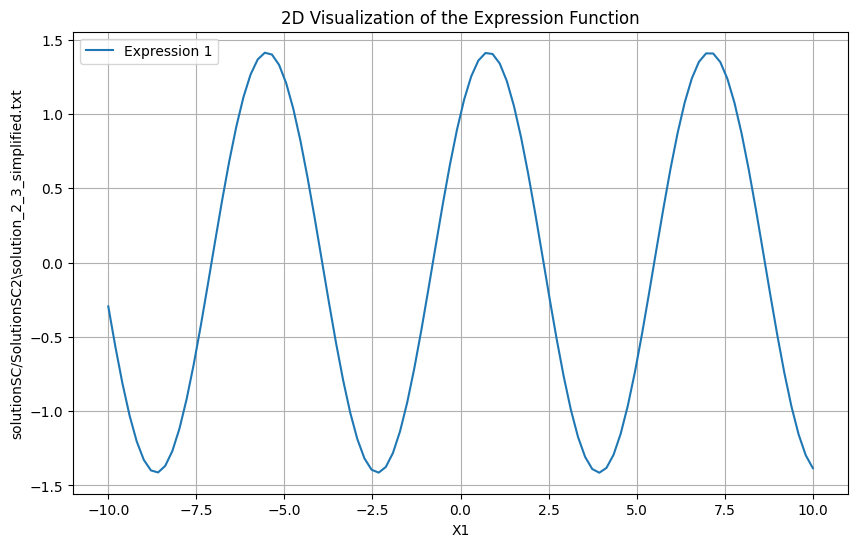

File solution/solution2\solution_2_3_simplified.txt not found.
Error evaluating expression: Sympify of expression 'could not parse '((-4.060908900621071 + ((((((0.1793194853888247 + (0.1793194853888247 + 0.9060902587471524)) * (-3.566120853278 / ((3.939685307610409 - X1 ) + (-1.583184247607512 / ((X1  / (((-0.03372927759647393 * (-3.9954356942865434 - (((-4.060908900621071 + ((-3.8633054224306096 - X1 ) / (-2.6111243378792603 + (2.7869665016166953 * (3.8583419809126536 / (((-3.566120853278 / (((-4.206369183632356 - X1 ) + (-3.8633054224306096 / ((-1.2379350196124772 - (((((0.9060902587471524 + (2.279627726403872 * (-1.6490669491592436 - ((0.0636633042438115 / 2.3712976961608865) / ((-4.872462990532297 * -3.8623474571974725) / -3.221771647851981))))) * 0.9190681698346879) / (((((3.8104260626872932 * 0.12249942825055005) + ((2.3712976961608865 + ((-4.060908900621071 + -2.8501057353820403) / (-3.221771647851981 * (X1  - -2.6365908073344455)))) / -4.029627266917739)) / 4.756636419081898) /

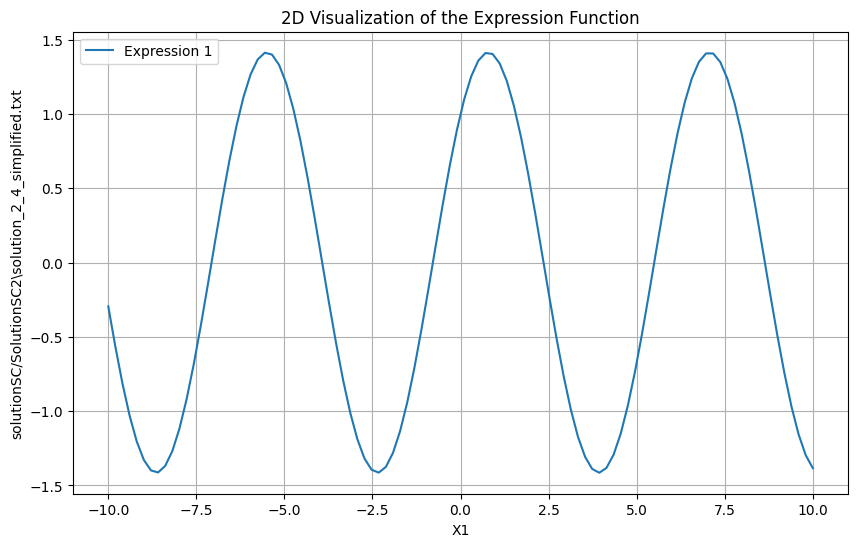

File solution/solution2\solution_2_4_simplified.txt not found.
Error evaluating expression: Sympify of expression 'could not parse '((((((2.2278681437806345 - ((X1  / (0.7939225248037349 + (X1  * ((2.0690944232184547 / ((((((2.0207534104418095 / (0.8755460218333759 * (4.907103147564342 / X1 ))) / (0.3546985854327662 - (-4.2767291591438195 - ((3.3714695621379622 / (2.2023077989339885 + (X1  * -0.3148800060612711))) * -4.67213649811871)))) * (1.6176882521334512 + (((2.0690944232184547 / (2.6794581483438193 + (-3.895096816411453 * ((-0.27520809987867345 / ((1.7902597825451956 * 2.2023077989339885) * (((-1.6519272194328947 * -1.4492220159026248) - (((X1  / 2.8428090304896987) - 2.467004932021019) / -4.67213649811871)) / (((4.448607271210081 * (0.11366965909268423 - -3.3105935860065494)) - ((2.2023077989339885 + 0.259025808481109) + (((-0.8177885818789381 + 3.9107228323382532) - -1.6122820371131863) - 0.7939225248037349))) + -1.6898232887650346)))) / ((4.907103147564342 - (((2.7400610749261

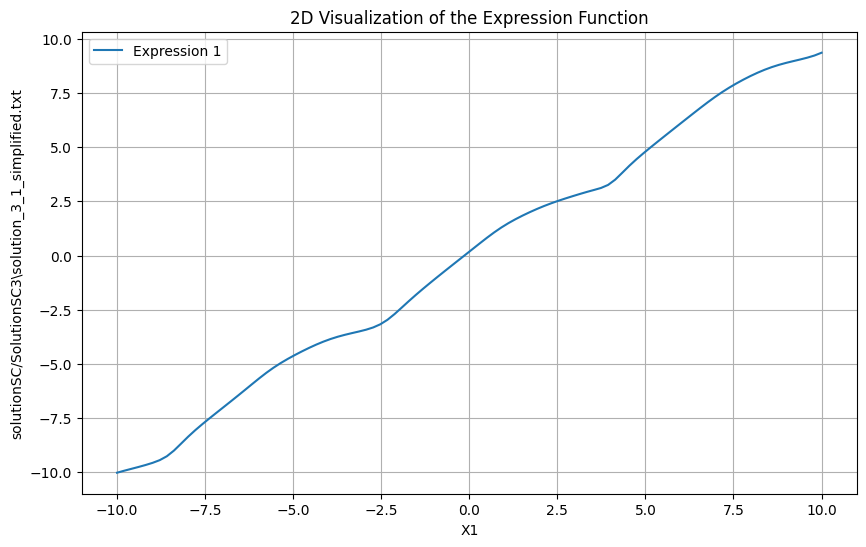

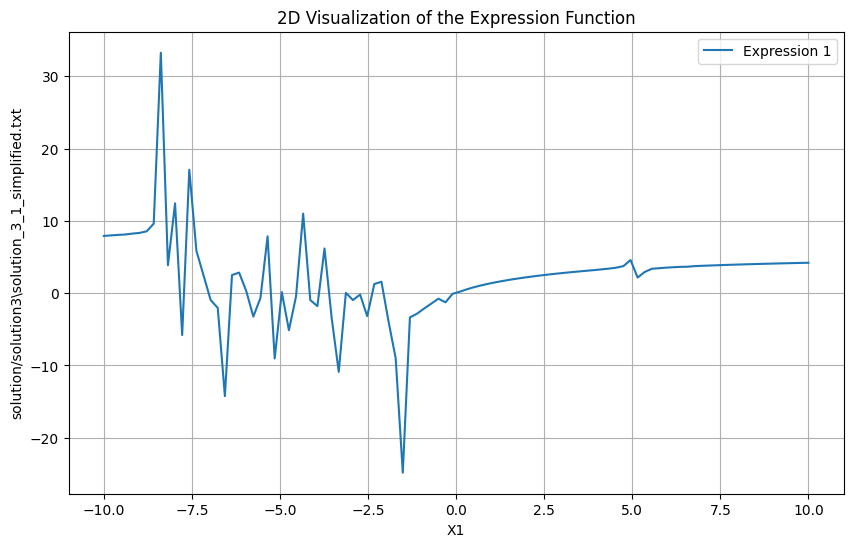

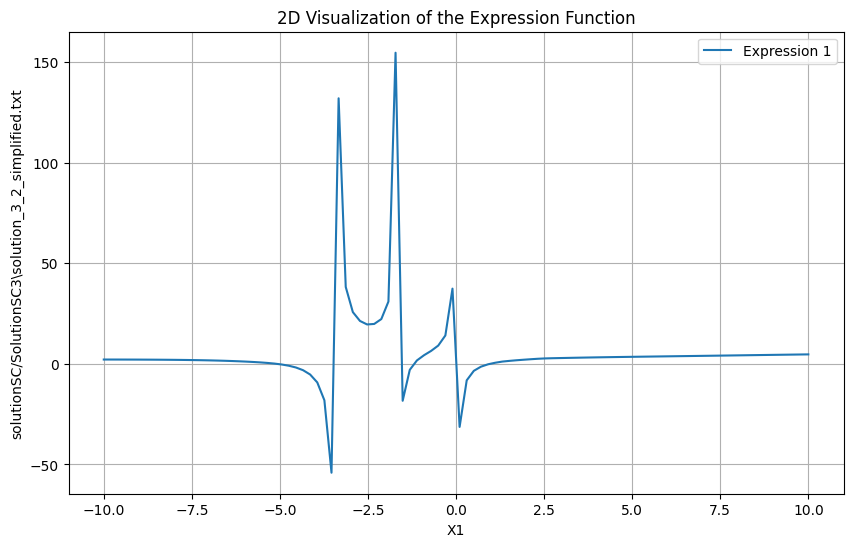

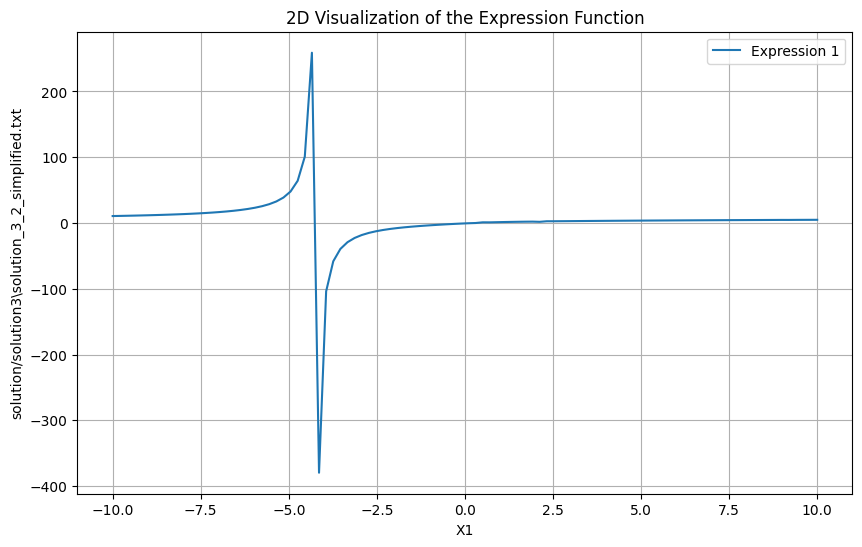

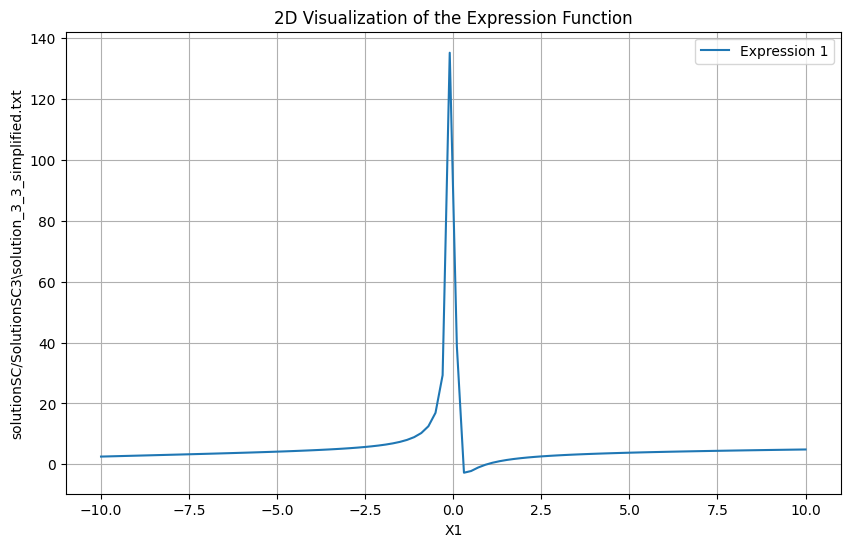

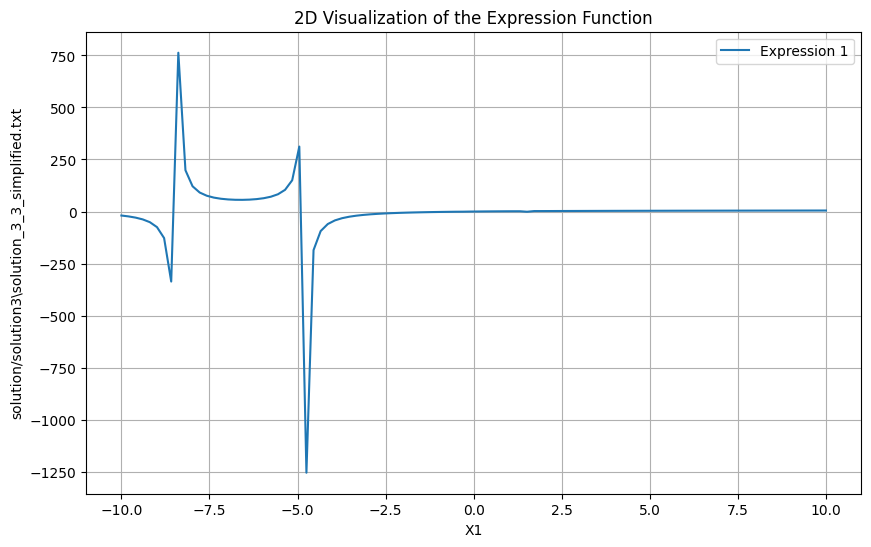

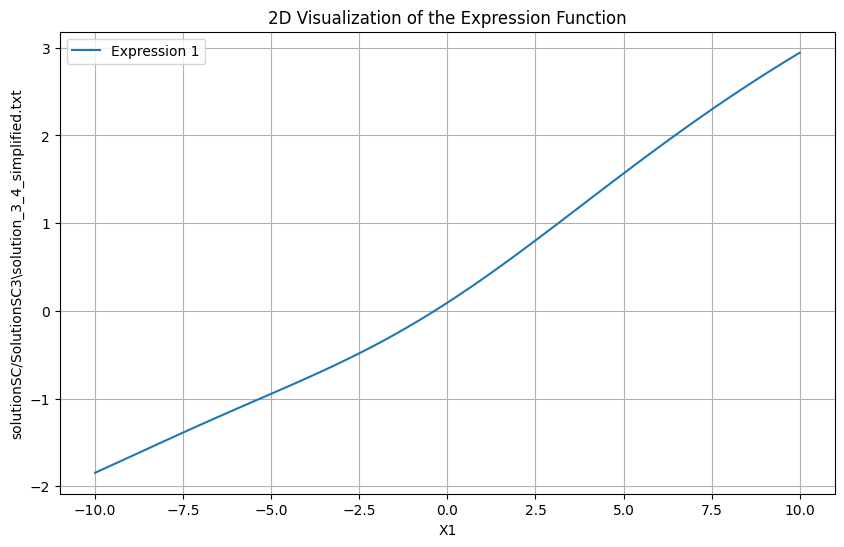

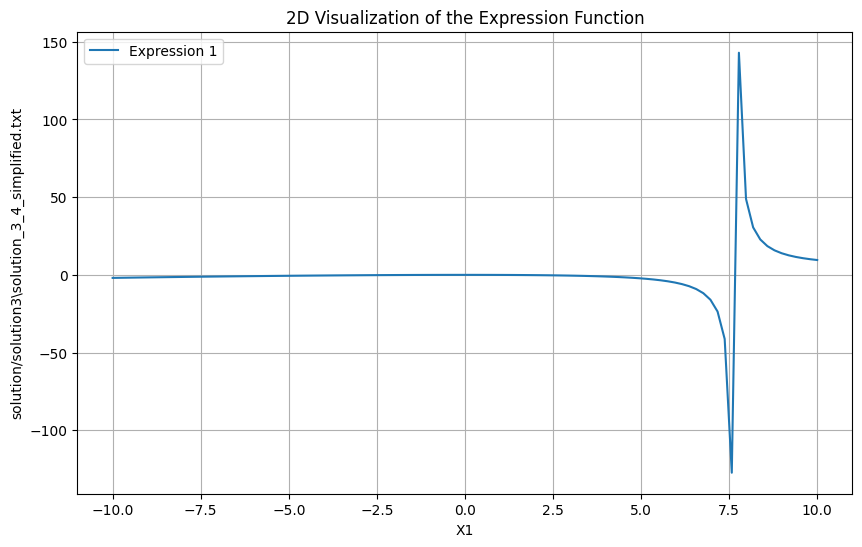

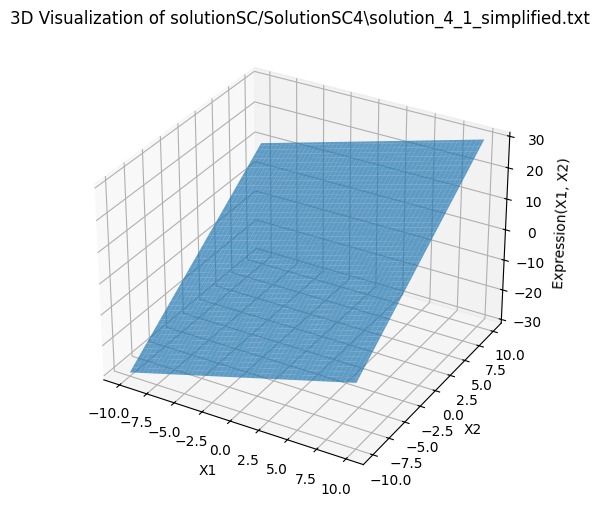

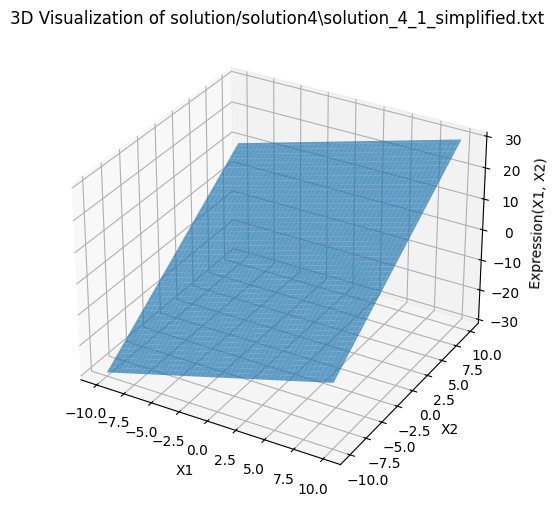

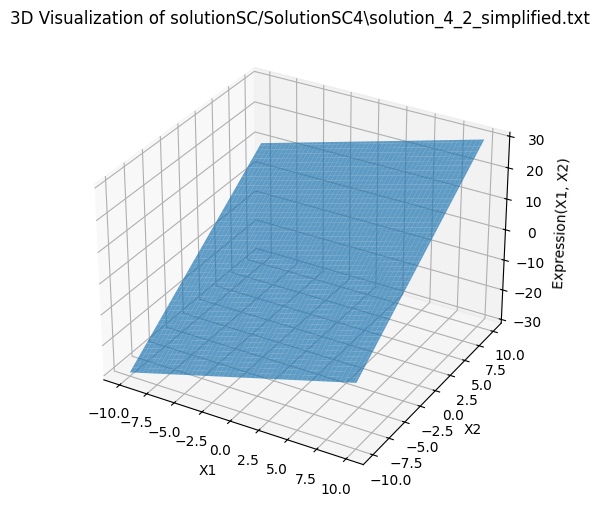

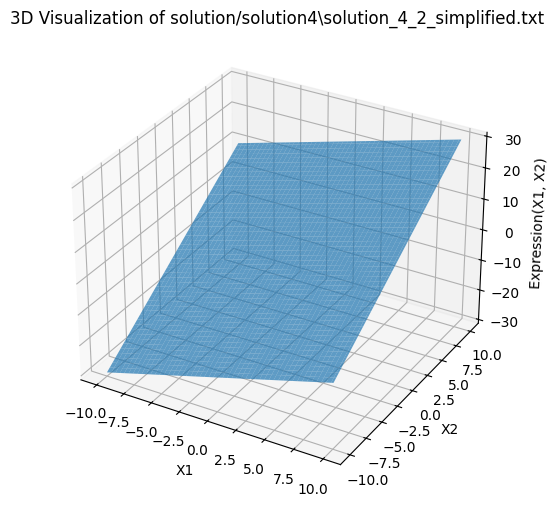

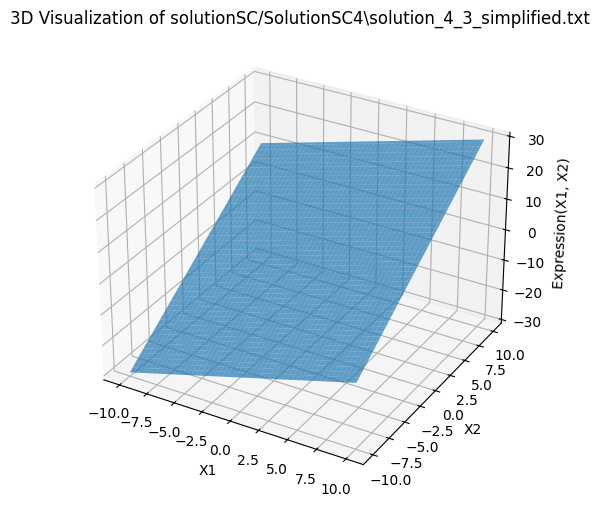

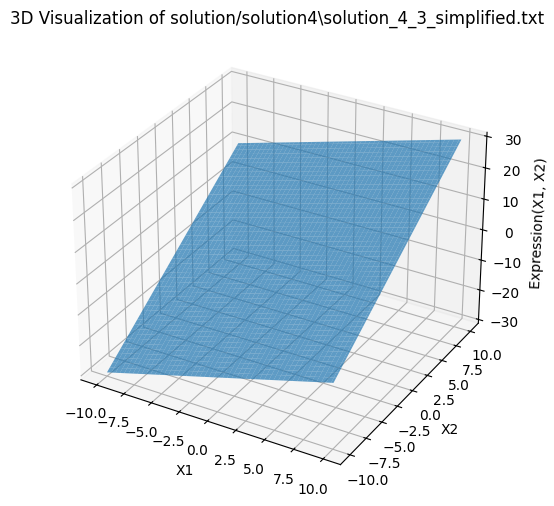

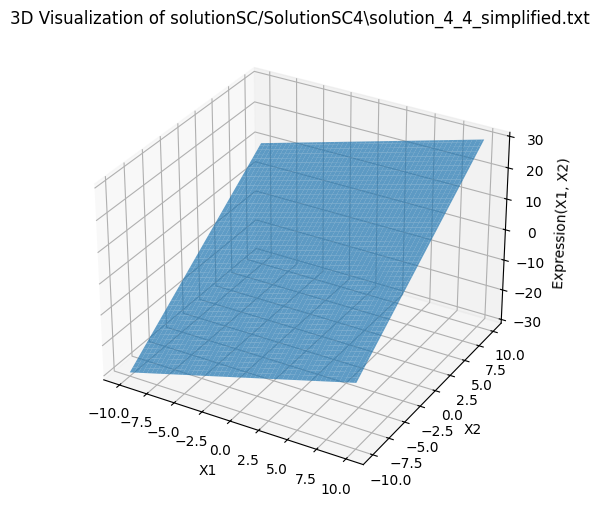

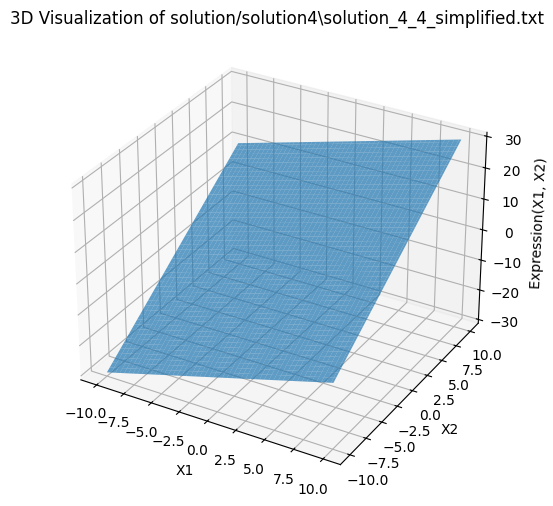

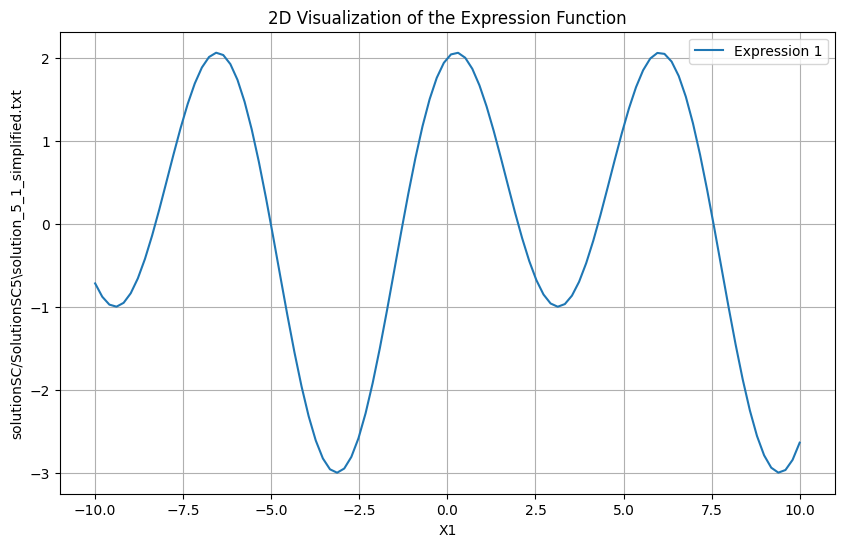

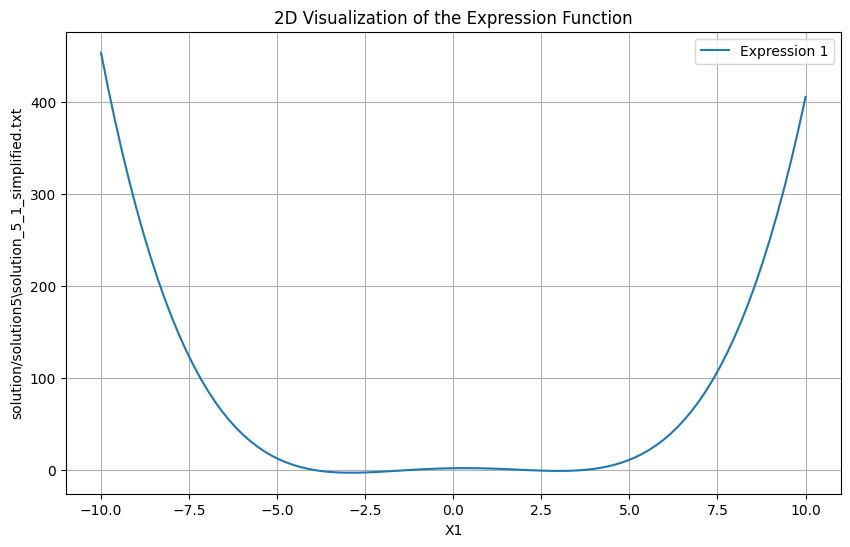

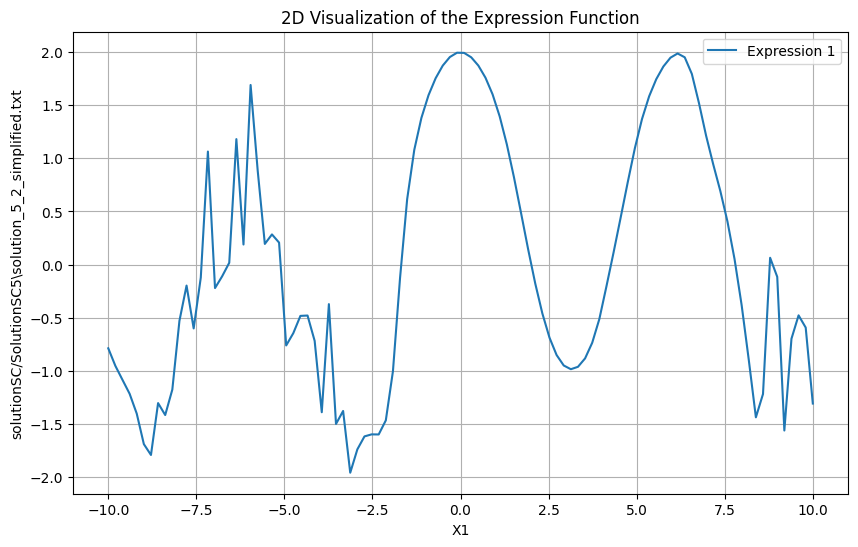

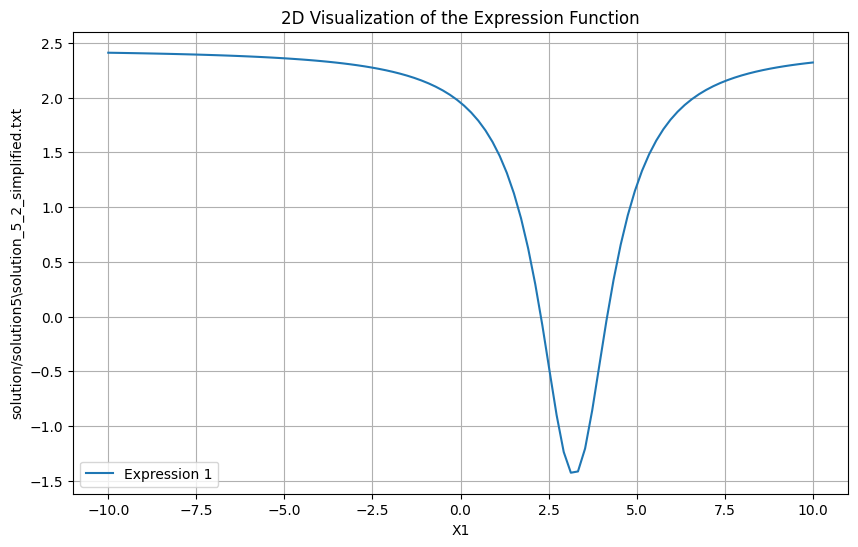

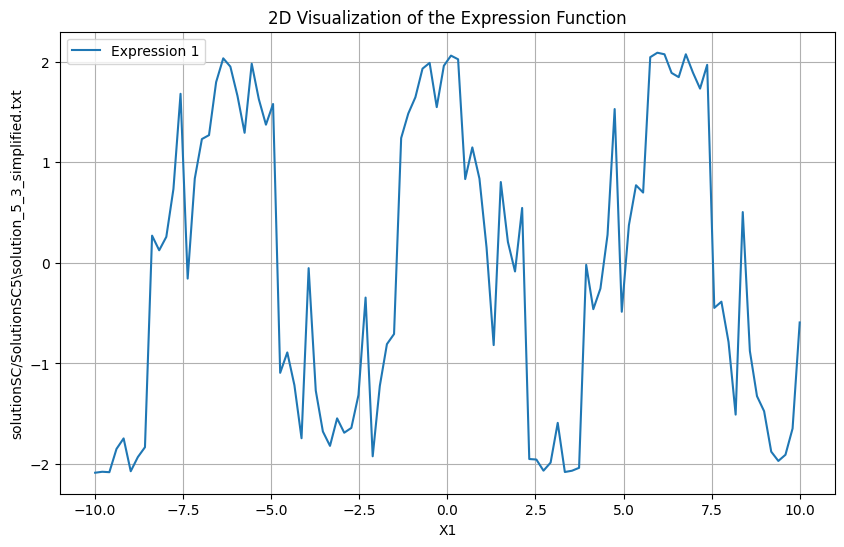

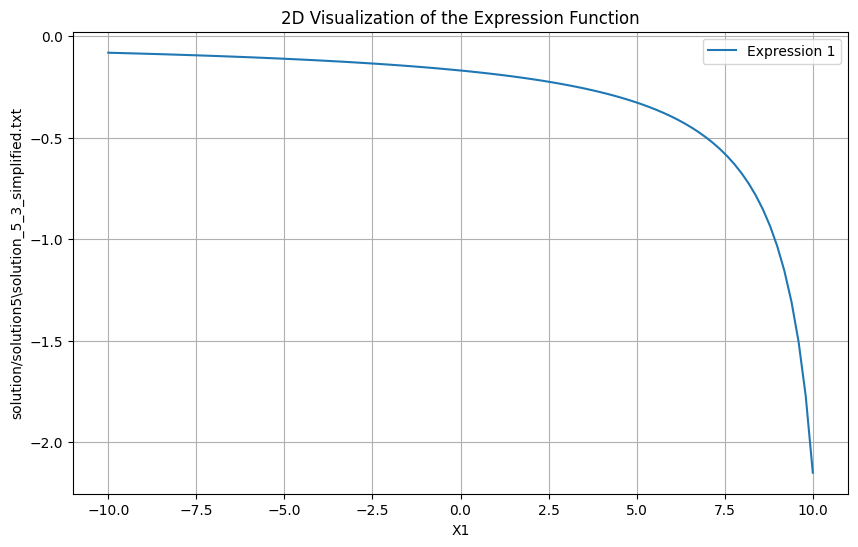

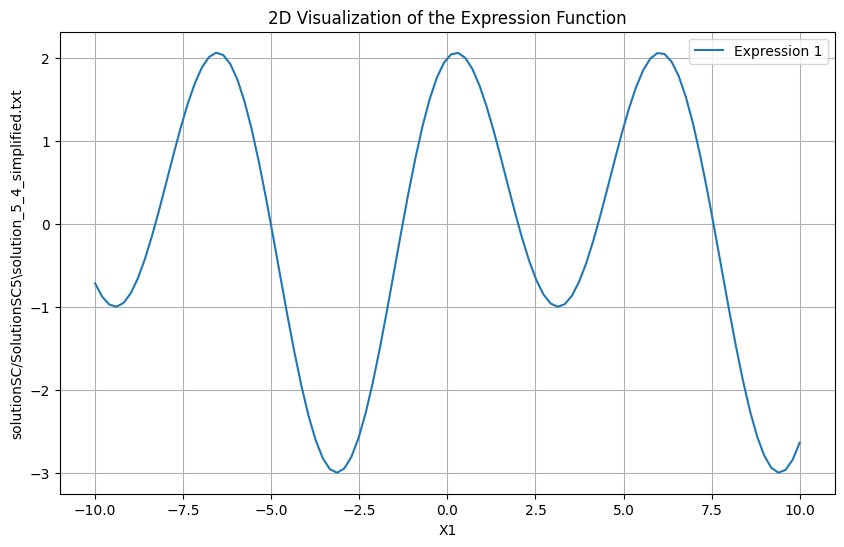

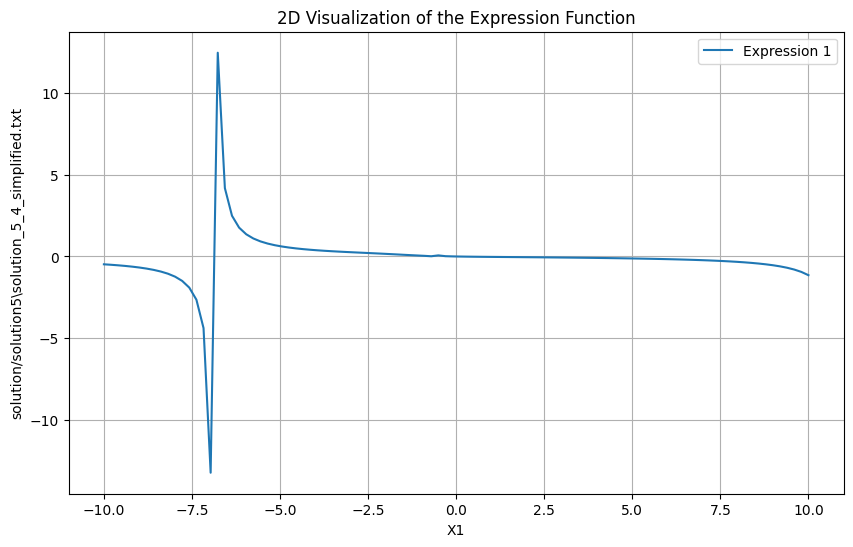

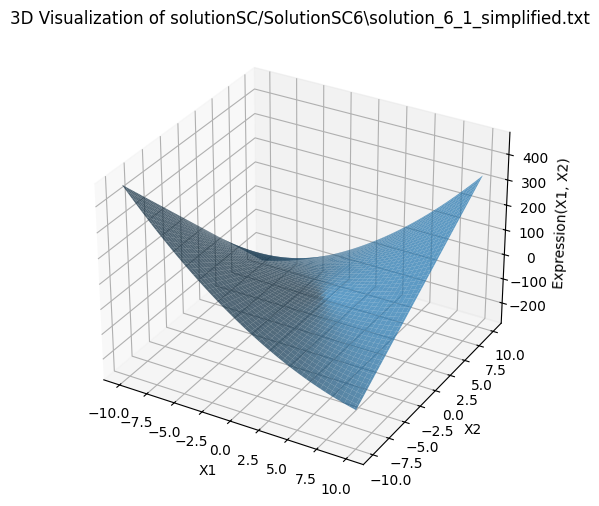

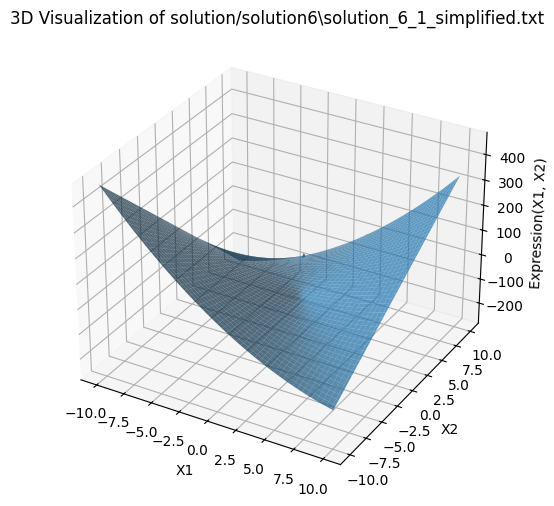

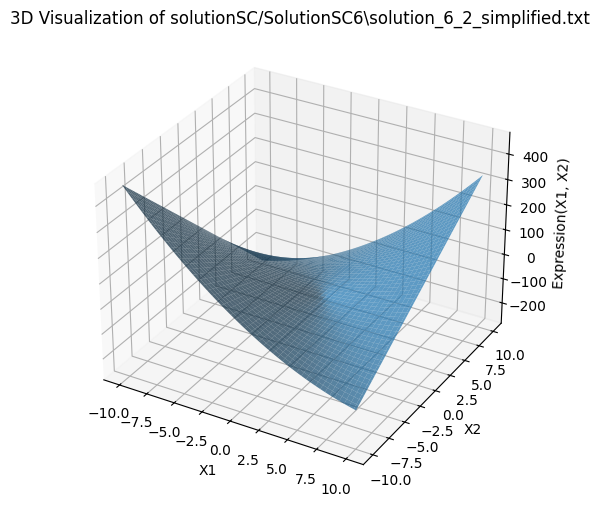

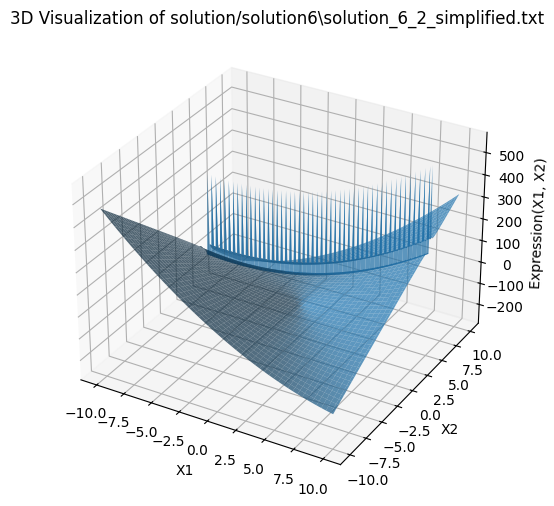

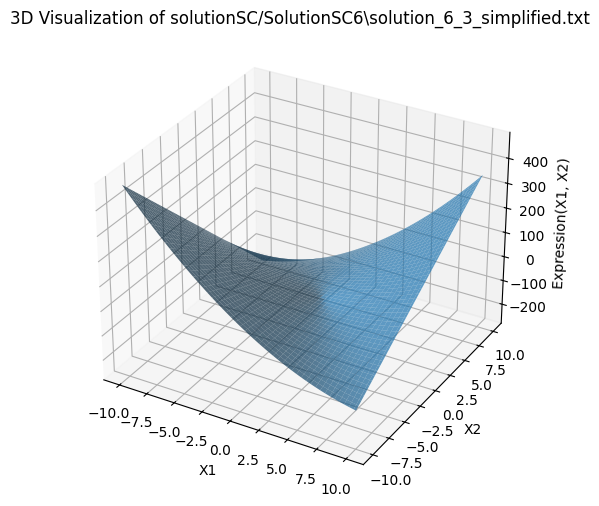

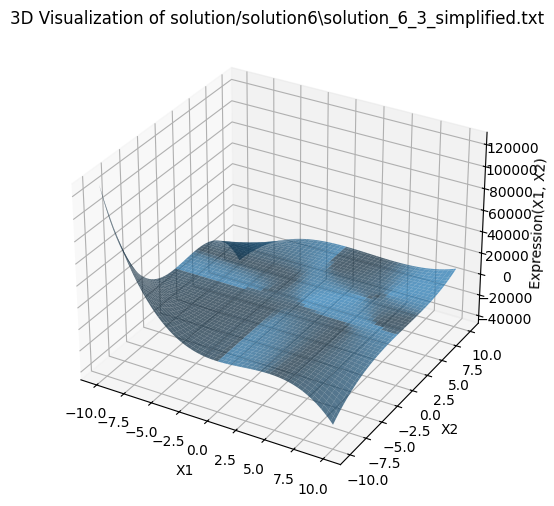

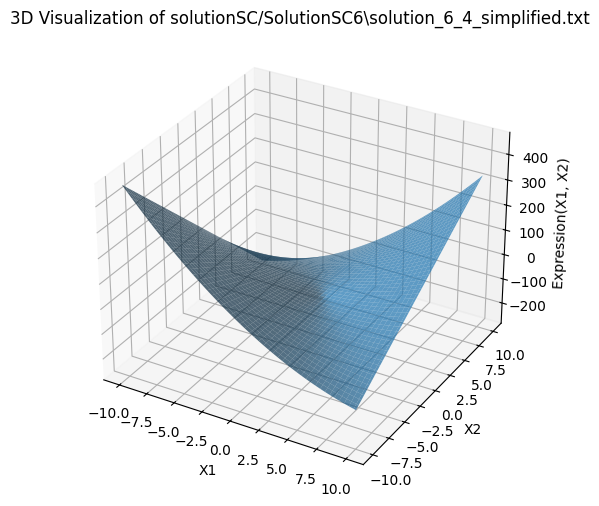

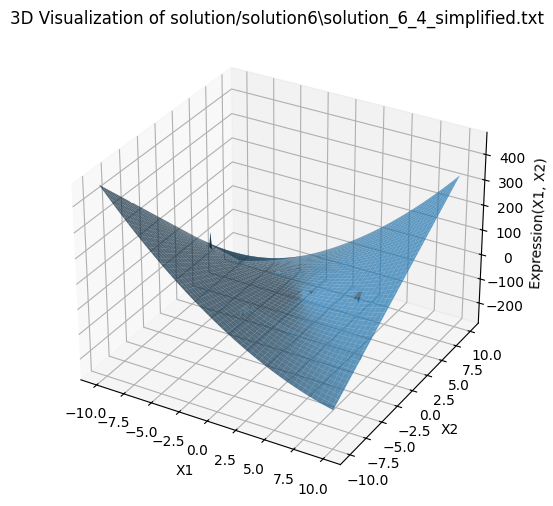

In [8]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits.mplot3d import Axes3D

def load_and_evaluate_expression(expression_str, x_values, y_values=None):
    try:
        X1, X2 = sp.symbols('X1 X2')
        
        sympy_expr = sp.sympify(expression_str)
        
        symbols_in_expr = sympy_expr.free_symbols
        substitutions = {}
        for symbol in symbols_in_expr:
            if symbol not in {X1, X2}:
                substitutions[symbol] = 0
        
        sympy_expr = sympy_expr.subs(substitutions)
        
        if y_values is not None:
            expr_func = sp.lambdify((X1, X2), sympy_expr, 'numpy')
            X1_vals, X2_vals = np.meshgrid(x_values, y_values)
            return X1_vals, X2_vals, expr_func(X1_vals, X2_vals)
        else:
            expr_func = sp.lambdify(X1, sympy_expr, 'numpy')
            return expr_func(x_values)
    except Exception as e:
        print(f"Error evaluating expression: {e}")
        return None

X = np.linspace(-10, 10, 100)

def read_and_plot(path, is_3d=False):
    y_values = []
    try:
        with open(path, 'r') as file:
            for line in file:
                expression_str = line.strip()
                if is_3d:
                    X2 = np.linspace(-10, 10, 100)
                    X1_vals, X2_vals, Z_vals = load_and_evaluate_expression(expression_str, X, X2)
                    if Z_vals is not None:
                        y_values.append((X1_vals, X2_vals, Z_vals))
                else:
                    y = load_and_evaluate_expression(expression_str, X)
                    if y is not None:
                        y_values.append(y)
    except FileNotFoundError:
        print(f"File {path} not found.")

        return False

    if y_values:
        fig = plt.figure(figsize=(10, 6))
        if is_3d:
            ax = fig.add_subplot(111, projection='3d')
            for idx, (X1_vals, X2_vals, Z_vals) in enumerate(y_values):
                ax.plot_surface(X1_vals, X2_vals, Z_vals, label=f'Expression {idx + 1}', alpha=0.7)
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Expression(X1, X2)')
            plt.title(f'3D Visualization of {path}')
        else:
            for idx, y in enumerate(y_values):
                plt.plot(X, y, label=f'Expression {idx + 1}')
            plt.xlabel('X1')
            plt.ylabel(f'{path}')
            plt.title('2D Visualization of the Expression Function')
            plt.legend()
        plt.grid(True)
        plt.show()
    return True

for folder_num in range(1, 7):
    folder_name = f"solutionSC/SolutionSC{folder_num}"
    folder_name1 = f"solution/solution{folder_num}"
    
    is_3d = folder_num in {4, 6}
    
    for i in range(1, 5):  
        file_name = f"solution_{folder_num}_{i}_simplified.txt"            
        full_path = os.path.join(folder_name, file_name)            
        read_and_plot(full_path, is_3d)
        full_path = os.path.join(folder_name1, file_name)            
        if (read_and_plot(full_path, is_3d) == False):
            file_name = f"solution_{folder_num}_{i}.txt"            
            full_path = os.path.join(folder_name1, file_name)            
            read_and_plot(full_path, is_3d)
        

    
